<a href="https://colab.research.google.com/github/j23-cs167/project-2-BenjaminSchell/blob/main/Project2_Schell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Benjamin Schell

Proposed Points (out of 25): 20

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

That data that I am using is food delivery from NYC. I got the data set from KRAGGE, it has around 1100 different ratings from customers. I would like to predict the rating a restruant would receive based on the cuisine type, speed of food preperation, and how fast the delivery was.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

Before loading the data into colab, I looked at the data in the excel format to understand what was happening. There were two columns at the front that I deleted completely. These two columns were order number and customer identification, both of these columns are meaningless because they are prectically a random string of numbers that would not be able to predict the rating of that particular order. In the rating column about 100 of the elements had no rating, so I deleted those observations. Without any rating from a customer it would be impossible to use them for predicting. After looking over the data one last time to see any other possible mistakes, I realized I need to create dummy variables for the catagorical columns. This is shown below.

In [44]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/January_23/food_order.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Cafe Habana,Mexican,12.23,Weekday,5,23,28
1,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
2,Dirty Bird to Go,American,11.59,Weekday,4,25,24
3,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
4,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [45]:
data_with_dummies = pd.get_dummies(data, columns=['cuisine_type', 'day_of_the_week'])
data_with_dummies.head()

,restaurant_name,cost_of_the_order,rating,food_preparation_time,delivery_time,cuisine_type_American,cuisine_type_Chinese,cuisine_type_French,cuisine_type_Indian,cuisine_type_Italian,...,cuisine_type_Korean,cuisine_type_Mediterranean,cuisine_type_Mexican,cuisine_type_Middle Eastern,cuisine_type_Southern,cuisine_type_Spanish,cuisine_type_Thai,cuisine_type_Vietnamese,day_of_the_week_Weekday,day_of_the_week_Weekend
0,Cafe Habana,12.23,5,23,28,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,Blue Ribbon Fried Chicken,29.20,3,25,15,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Dirty Bird to Go,11.59,4,25,24,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tamarind TriBeCa,25.22,3,20,24,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Barbounia,5.97,3,33,30,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [46]:
import warnings
warnings.filterwarnings("ignore")

# 3. Research

Put your code and your experiments here.

In [47]:
### BASE LINE MODEL ###
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

predictors = data_with_dummies.columns.drop('rating').drop('restaurant_name')
target = 'rating'

train_data, test_data, train_sln, test_sln = train_test_split(data_with_dummies[predictors], data_with_dummies[target], test_size = 0.2, random_state=41)

dummy_regr = DummyRegressor() # will always predict the average of the target
dummy_regr.fit(train_data, train_sln)
predictions_dummy = dummy_regr.predict(test_data)

print('The MSE of this model is:', metrics.mean_squared_error(test_sln, predictions_dummy))

The MSE of this model is: 0.5529846743688092


In [48]:
### NORMALIZING THE DATA ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [49]:
### WEIGHTED k-NN REGRESSION MODEL ###
from sklearn import neighbors
w_knn = neighbors.KNeighborsRegressor(weights='distance')
w_knn.fit(train_data,train_sln)
predictions_w_knn = w_knn.predict(test_data)
print('The MSE of this model is:', metrics.mean_squared_error(test_sln, predictions_w_knn))

The MSE of this model is: 0.6191635090582309


In [50]:
### RANDOM FOREST MODEL ###
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 41)
forest.fit(train_data,train_sln)
predictions_forest = forest.predict(test_data)
print('The MSE of this model is:', metrics.mean_squared_error(test_sln, predictions_forest))

The MSE of this model is: 0.6355924654268001


In [51]:
### PRECEPTRON MODEL ###
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(train_data,train_sln)
predictions_perceptron = perceptron.predict(test_data)
print('The MSE of this model is:', metrics.mean_squared_error(test_sln, predictions_perceptron))

The MSE of this model is: 1.0085836909871244


In [52]:
### PERCEPTRON GRAPH ###
series_perceptron = []
for j in range(1, 20):
  perceptron_2 = Perceptron(max_iter=j)
  perceptron_2.fit(train_data,train_sln)
  predictions_perceptron_2 = perceptron_2.predict(test_data)
  series_perceptron.append(metrics.mean_squared_error(test_sln, predictions_perceptron_2))

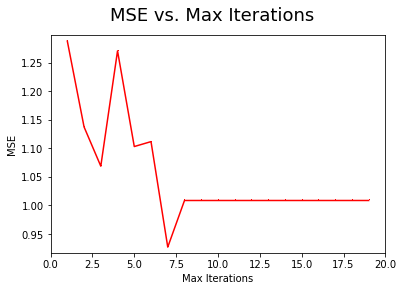

In [53]:
### PLOTING POINTS ###
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
xvals = range(1, 20)
plt.suptitle('MSE vs. Max Iterations', fontsize=18)
plt.xlabel('Max Iterations')
plt.ylabel('MSE')
plt.plot(xvals, series_perceptron, 'r,-')
plt.axis([0, 20, pd.Series(series_perceptron).min()-.01,pd.Series(series_perceptron).max()+.01])
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

One thing that was very interesting is that the model that happend to have the lowest MSE was the dummy baseling regession model. This model will always predict the average of the target variable. So it is very supprizing that it did a better job predicting the rating of a restruant than weighted K-NN or even a random forest. I would have thought that k-nn would do the best model, this is because I expected there to be groups of restruants with similar attributes and similar ratings. For example if a restraunt is fast to deilver the food and is open on weekdays and is italian it would be place close to the restraunts on a dimensional graph. The reason it may not be that case is because even if the variables are all relatively close to each other the user writing the review may have hated the food, thus lowing the score and making the neighbors approach irrelavent. The worst model was the preceptron with an almost doubling of MSE than the baseline model. I am not confident as to the reason for this, but it could be that I did not train the perceptron through enough epochs for it to reach its minimum MSE. To combat this I used a graph to see were the minimum MSE would be and it was around .9 in the 7th epoch. The perceptron epochs after that would be overfitting the training data and worsening the testing MSE. Still this MSE would well above that of the other models.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The only challenge I really faced was trying to find a dataset that was not only interseting, but also something with usable data. At first I found a dataset that I wanted to use, unfortunatally the data was so mixed it would have been impossible to use. There were only 4 columns, 3 after using one as a target variable. Of the last 3 one was a date column that had 3 different displays. One of the date types was day-month-year, another was month-day-year, and the third was month spelled out-day-year. Trying to use those dates in any would be impossible for me to figure out. I looked through 4-5 other datasets, most were to small (<500). I then found this data and it looked perfect, after some manipulation I arrived at this step writing all the the bumps out.

1: Problem            || 2/2	
2: Data Prep          || 2/2	
3: Research           || 9/10	
4: Analysis           || 7/10	
5: Bumps in the Road. || 1/1	
Total                 || 21/25	